In [2]:
'''
@File    :   network_analysis.ipynb
@Time    :   2023/08/02 10:52:36
@Author  :   Surya Chandra Kalia
@Version :   1.0
@Contact :   suryackalia@gmail.com
@Org     :   Kasthuri Lab, University of Chicago
'''

'\n@File    :   network_analysis.ipynb\n@Time    :   2023/08/02 10:52:36\n@Author  :   Surya Chandra Kalia\n@Version :   1.0\n@Contact :   suryackalia@gmail.com\n@Org     :   Kasthuri Lab, University of Chicago\n'

In [14]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import os
import sys
import numpy as np
import pickle
import lzma
import matplotlib.pyplot as plt
import csv
import h5py
from tqdm import tqdm
from PIL import Image
sys.path.insert(0, os.path.abspath('/home/suryakalia/documents/summer/exploration/kasthurilab_connectomics/'))
# Need to add above path since VSCode Jupyter Notebook doesn't respect system's $PYTHONPATH variable
# This will be eliminated once my module is converted to a conda package and installed to the conda env

from sk_connectomics.util.visualize import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
src_dir = "/home/suryakalia/documents/summer/tests/hanyu_analysis/"
conn_matrix = np.asarray(Image.open(src_dir + "adjacency_matrix_cleft.png")) 

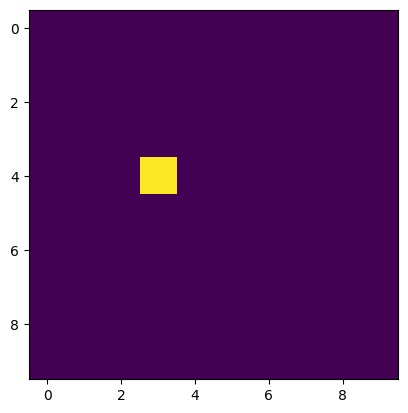

In [22]:
plt.imshow(conn_matrix[90:100,190:200])

In [25]:
# Inspect node pair with highest connectivity. Can see it is due to incorrect synapse prediction. Will be better when using GT data
np.unravel_index(conn_matrix.argmax(), conn_matrix.shape)

(94, 193)

In [52]:
# Create NetworkX grap for analysis
G = nx.Graph()
num_nodes = conn_matrix.shape[0]
G.add_nodes_from(range(num_nodes))
for i in range (num_nodes):
  for j in range (i+1, num_nodes):
    if (conn_matrix[i][j] > 0):
      G.add_edge(i,j)
print("Num nodes = ", G.number_of_nodes())
print("Num edges = ", G.number_of_edges())

Num nodes =  6127
Num edges =  1504


In [ ]:
list(nx.enumerate_all_cliques(G))

In [40]:
clique_length_list =list(((len(c)) for c in nx.find_cliques(G)))

In [42]:
print(sorted(clique_length_list, reverse=True) )

[5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [59]:
for c in nx.find_cliques(G):
  if (len(c) == 5):
    print(c)

[34, 5481, 2738, 3962, 85]
[50, 1814, 1964, 357, 5296]
[50, 1814, 1964, 357, 2261]
[50, 1814, 1964, 357, 4150]
[94, 2794, 491, 1489, 5363]
[249, 2617, 3115, 1314, 4324]
[471, 719, 3180, 3469, 3031]


In [51]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.hist(clique_length_list > 1, bins=5)
plt.xlabel("Clique Size")
plt.ylabel("Instance count")
plt.title("Histogram of the cliques detected in neural graph")
plt.show() 

TypeError: '>' not supported between instances of 'list' and 'int'

In [46]:
G_test = nx.Graph()
G_test.add_nodes_from(range(5))
G_test.add_edge(0,1)
G_test.add_edge(1,2)
G_test.add_edge(2,0)
G_test.add_edge(3,4)

In [47]:
test_clique_length_list =list(((len(c)) for c in nx.find_cliques(G_test)))

In [48]:
test_clique_length_list

[3, 2]

In [53]:
centrality_map = nx.degree_centrality(G)

In [55]:
max(centrality_map.values())

0.0037544890630101207

In [56]:
nx.average_clustering(G)

0.0866550511372788

In [58]:
len(nx.cycle_basis(G))

480

In [18]:
clique_mask = get_segment_mask([34, 5481, 2738, 3962, 85], data_dir = "/home/suryakalia/documents/summer/tests/hanyu_analysis/", h5_file_name = "p105.h5")

New neuron_id_new_old_map  {0: 1881841, 1: 1586679, 2: 2354502, 3: 2325061, 4: 2289338, 5: 1889036, 6: 6302457, 7: 1884278, 8: 2326249, 9: 2289241, 10: 1888080, 11: 2314927, 12: 2302296, 13: 1886272, 14: 1881846, 15: 1894928, 16: 6292032, 17: 2483054, 18: 6312323, 19: 2319206, 20: 1893508, 21: 1889756, 22: 2843497, 23: 3429543, 24: 6291054, 25: 6933793, 26: 6304426, 27: 2309708, 28: 2877979, 29: 2322922, 30: 1890812, 31: 2473019, 32: 2289203, 33: 3053821, 34: 2683916, 35: 6289836, 36: 6287230, 37: 2686631, 38: 1893143, 39: 2290351, 40: 2518729, 41: 1881905, 42: 2668490, 43: 6288401, 44: 2668613, 45: 1887246, 46: 2479466, 47: 6309907, 48: 2319278, 49: 1888608, 50: 6293727, 51: 1889782, 52: 2307855, 53: 6316288, 54: 2300245, 55: 1889828, 56: 1892162, 57: 6307253, 58: 2313786, 59: 5184282, 60: 2886985, 61: 2886207, 62: 2289225, 63: 1886850, 64: 6309397, 65: 2319545, 66: 2289316, 67: 2673660, 68: 2714680, 69: 6313966, 70: 6291073, 71: 6305541, 72: 1964013, 73: 1889175, 74: 2684300, 75: 264

Layer Sums:  [  89   79   81  100  118  154  184  214  258  306  355  411  494  607
  743  983 1561 1997 1766 2955 3058 3253 3502 3665 3952 4149 4229 4400
 4637 4869 5196 5326 5435 5587 5833 6289 6550 6736 6765 6607 6037 5686
 5467 5281 4825 3717 2860 2654 2442 2229 2030 1912 1719 1795 1749 1768
 1869 1730 1615 1398 1204 1140 1133 1146 1069 1020  951  934  850  865
  904 1034 1308 1977 2635 2943 3254 3508 3996 4415 4479 4366 4294 4291
 4282 4253 4121 3800 3689 3731 3738 3718 3565 3290 3005 2733 2251 1864
 1698 1603]
Layer with largest cross sectional area:  38


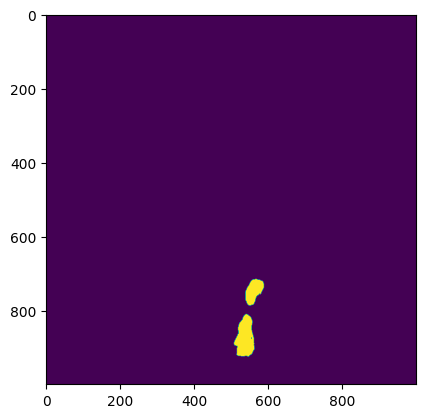

In [19]:
get_best_slice(clique_mask)

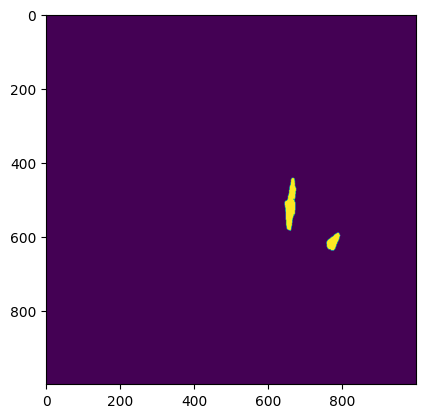

In [28]:
plt.imshow(clique_mask[90 , :, :])